# FiveThirtyEight Election Poll Results

https://data.fivethirtyeight.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
!ls 538_election_polls

README.md                    president_approval_polls.csv
generic_ballot_polls.csv     president_polls.csv
governor_polls.csv           president_primary_polls.csv
house_polls.csv              senate_polls.csv


In [3]:
president_primary_polls = pd.read_csv('538_election_polls/president_primary_polls.csv')

In [4]:
def convert_dates(df):
    dates = pd.to_datetime(df['end_date'])
    df['Date'] = dates
    df = df.sort_values('Date', ascending=True)
    df = df.set_index('Date')
    return df

In [5]:
def plot_with_resampling(data,candidates,resample_length='M',show_original=True):
    
    fig, ax = plt.subplots()
    for candidate in candidates:
        results = data.query('answer==@candidate')
        sampled = results['pct'].resample(resample_length).median() 
        
        if show_original:
            ax.plot(results['pct'],
            marker='.', linestyle='-', linewidth=0.5,)
        ax.plot(sampled,
        marker='o', markersize=8, linestyle='-', label=candidate)
    ax.set_ylabel('Poll Results')
    ax.legend();

In [6]:
president_primary_polls = convert_dates(president_primary_polls)

## Democratic Primary Polls

In [7]:
party = 'DEM'
dem_polls = president_primary_polls.query('party==@party')

/Users/Emily/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


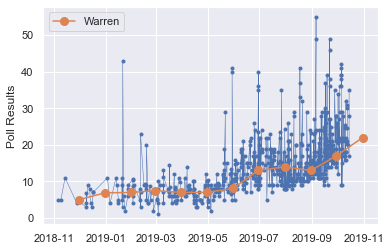

In [8]:
# Much more data with 538 than RCP
plot_with_resampling(dem_polls,['Warren'])

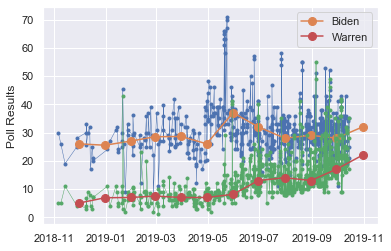

In [9]:
# Biden v. Warren
plot_with_resampling(dem_polls,['Biden','Warren'])

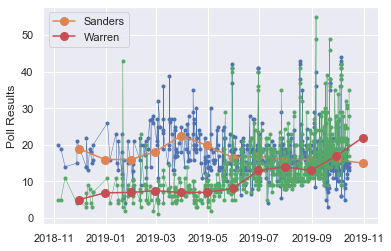

In [13]:
# Sanders v. Warren
plot_with_resampling(dem_polls,['Sanders','Warren'])

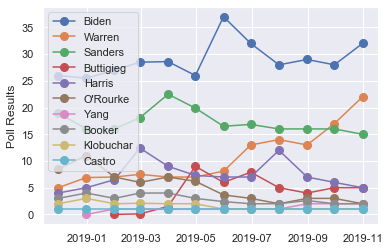

In [27]:
# Those in latest debates
candidates = ['Biden', 'Warren', 'Sanders', 'Buttigieg', 'Harris', "O'Rourke", 'Yang','Booker', 'Klobuchar', 'Castro']
plot_with_resampling(dem_polls,candidates,show_original=False)

## Fte Grades

In [28]:
grade_mapper = {'A+':4.4,'A':4.0,'A-':3.7,'B+':3.3,'B':3.0,'B-':2.7,'C+':2.3,'C':2.0,'C-':1.7,'D+':1.3,'D':1.0,'D-':.7}
president_primary_polls['fte_grade'] = president_primary_polls['fte_grade'].map(grade_mapper) # could fill NaNs with zero if we want 

Text(0.5, 1.0, 'Biden Primary Results')

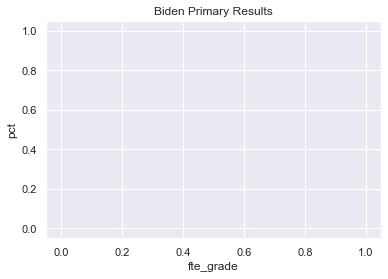

In [29]:
# Grab the Biden results for which we have a non-Nan fte grade
candidate = 'Biden'
biden_results = president_primary_polls.query('answer==@candidate&fte_grade==fte_grade')
plt.scatter(biden_results['fte_grade'],biden_results['pct'])
plt.ylabel('pct')
plt.xlabel('fte_grade')
plt.title('Biden Primary Results')

Text(0.5, 1.0, 'Biden Primary Results')

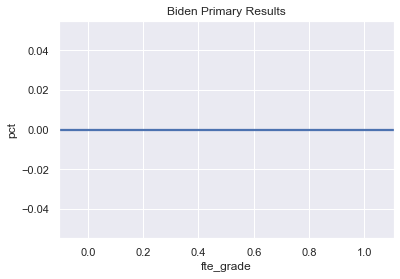

In [30]:
# Seeing if there is a correlation with how the front runner performs and the grade of the survey
sns.regplot(biden_results['fte_grade'],biden_results['pct'])
plt.title('Biden Primary Results')

## General Election Polls

Looks like each question represents a match up, so need to be careful comparing the right questions.

In [31]:
president_polls = convert_dates(pd.read_csv('538_election_polls/president_polls.csv'))

In [32]:
def get_matchup_results(data,versus_candidate):
    results = pd.DataFrame({})
    question_ids = data.query('answer==@versus_candidate').question_id
    for question_id in question_ids.values:
        results = results.append(data.query('question_id==@question_id'))
    return results

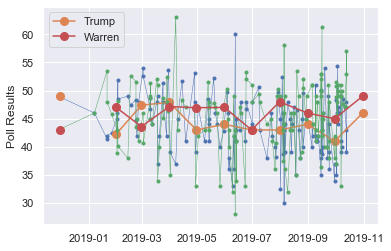

In [33]:
warren_results = get_matchup_results(president_polls,'Warren')
plot_with_resampling(warren_results,['Trump','Warren'])

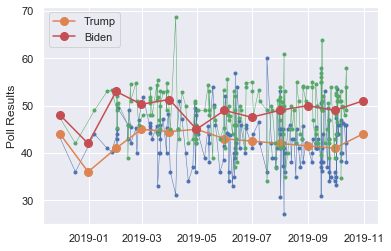

In [34]:
biden_results = get_matchup_results(president_polls,'Biden')
plot_with_resampling(biden_results,['Trump','Biden'])

### President Approval Polls

In [35]:
def plot_approval_with_resampling(results,data_columns,resample_length='W'):
    sampled_mean = results[data_columns].resample(resample_length).median()
    fig, ax = plt.subplots()
    for answer in data_columns:
        ax.plot(results[answer],
        marker='.', linestyle='-', linewidth=0.5,)
        ax.plot(sampled_mean[answer],
        marker='o', markersize=8, linestyle='-', label=answer)
    ax.set_ylabel('Poll Results')
    ax.legend();

In [36]:
approval_ratings = convert_dates(pd.read_csv('538_election_polls/president_approval_polls.csv'))

Text(0.5, 1.0, 'Trump Approval Ratings')

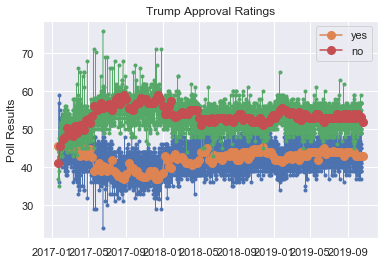

In [37]:
plot_approval_with_resampling(approval_ratings,['yes','no'])
plt.title('Trump Approval Ratings')

Text(0.5, 1.0, 'Trump Approval Ratings Among Registered Voters')

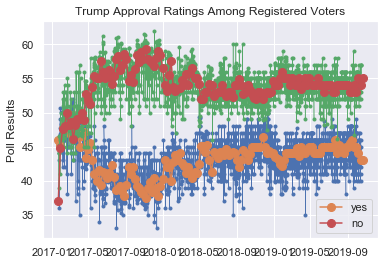

In [38]:
poptype='rv'
plot_approval_with_resampling(approval_ratings.query('population==@poptype'),['yes','no'])
plt.title('Trump Approval Ratings Among Registered Voters')